# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv"

### Step 3. Assign it to a variable apple

In [3]:
apple = pd.read_csv(url)

### Step 4.  Check out the type of the columns

In [4]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null object
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: float64(5), int64(1), object(1)
memory usage: 463.0+ KB


In [5]:
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 5. Transform the Date column as a datetime type

In [6]:
apple['Date'] =  pd.to_datetime(apple['Date'], format='%Y-%m-%d')

In [7]:
apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8465 entries, 0 to 8464
Data columns (total 7 columns):
Date         8465 non-null datetime64[ns]
Open         8465 non-null float64
High         8465 non-null float64
Low          8465 non-null float64
Close        8465 non-null float64
Volume       8465 non-null int64
Adj Close    8465 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 463.0 KB


### Step 6.  Set the date as the index

In [8]:
apple = apple.set_index('Date')
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [9]:
apple.index.is_unique
# There aren't any duplicate dates

True

### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [10]:
apple = apple.sort_index(ascending = True)

In [11]:
apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [12]:
# Resample the date by month('M')
last_business_day = apple.resample('M').last()
last_business_day.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,34.25,34.25,34.13,34.13,8937600,0.53
1981-01-31,28.50,28.50,28.25,28.25,11547200,0.44
1981-02-28,26.50,26.75,26.50,26.50,3690400,0.41
1981-03-31,24.75,24.75,24.50,24.50,3998400,0.38
1981-04-30,28.38,28.62,28.38,28.38,3152800,0.44


### Step 10.  What is the difference in days between the first day and the oldest

In [13]:
abs((apple.index[0] - apple.index[-1]).days)

12261

### Step 11.  How many months in the data we have?

In [14]:
# Since the last_business_days datframe has the last value for each month
last_business_day.shape[0]

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

In [15]:
sns.set(rc={'figure.figsize':(13.5, 9)})

/usr/local/lib/python2.7/dist-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


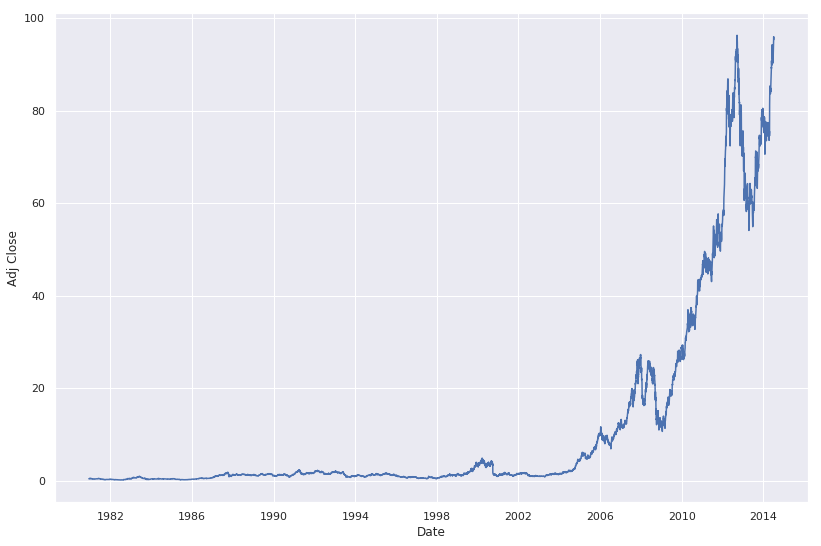

In [16]:
sns.lineplot(data=apple, x=apple.index, y='Adj Close')